# Project: TMdb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I am going to determine how the movie's voting average differs according to the movie genres, runtime, popularity and release year. So I set voting average as a dependent variable and runtime, release year, genres and popularity as independent variable. 


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

I am going to load the 'tmdb-movie.csv' file and investigate the data set. The data set is huge and there are many columns which are unnessary. So I have written a program step by step to determine the size of the table and see if there are any missing value or duplicates.

### General Properties

First step is to load the data and take a look at the first 5 rows.

In [2]:
df = pd.read_csv('tmdb-movies.csv')

df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next I compute the row and column of the data set

In [3]:
df.shape

(10866, 21)

Provides a statistics of the data table

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Cheking to see whether there are null values in each columns and checking the total sum of each null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Check to see if there are any duplicates.

In [7]:
df.duplicated().sum()

1

### Data Cleaning

In this section I am going to clean up this messy data. First I will drop the colums which I am not going to use and then I will fix the table.

Here I am dropping the columns that are unnessary. I dropped id, imdb_id, cast, homepage, director, tagline, keywords, overview, production_companies, budget_adj, revenue_adj, release date, vote count, budget and revenue.

In [8]:
df.drop(['id','imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'release_date', 'vote_count', 'original_title', 'budget', 'revenue'], axis=1, inplace=True)

The table below displays 5 columns, where vote_average is the dependent variable and all the other columns are independent variables. 

In [9]:
df.head()

,popularity,runtime,genres,vote_average,release_year
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,137,Action|Crime|Thriller,7.3,2015


In [10]:
df.isnull().sum()

popularity       0
runtime          0
genres          23
vote_average     0
release_year     0
dtype: int64

As shown above, genres column has 23 null values. Next I am goin to drop those null values

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10843 non-null float64
runtime         10843 non-null int64
genres          10843 non-null object
vote_average    10843 non-null float64
release_year    10843 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 508.3+ KB


Now I am going to check for duplicates. If so I will remove them.

In [12]:
df.duplicated().sum()

1

Now I removed the duplicates

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10842 non-null float64
runtime         10842 non-null int64
genres          10842 non-null object
vote_average    10842 non-null float64
release_year    10842 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 508.2+ KB


In [16]:
df.head()

,popularity,runtime,genres,vote_average,release_year
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,137,Action|Crime|Thriller,7.3,2015


Now in the genres column there are more than one genres in the genres columns. So I wrote an algorithm below which will split the genres into seperate rows, so there will be one genres in each rows. 

In [17]:
new_df = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
new_df.head()

,popularity,runtime,vote_average,release_year,genres
0,32.985763,124,6.5,2015,Action
0,32.985763,124,6.5,2015,Adventure
0,32.985763,124,6.5,2015,Science Fiction
0,32.985763,124,6.5,2015,Thriller
1,28.419936,120,7.1,2015,Action


In [18]:
new_df.shape

(26955, 5)

In [19]:
new_df.duplicated().sum()

0

Now the data is clean. I again check if there are duplicates. Now the number of rows have increased. 

<a id='eda'></a>
## Exploratory Data Analysis
In this section I listed the research question and I answered them by computing the statistics and bar graph or scatter plot of the data.

### Research Question 1: Which Genres have the highest voting average?

In [20]:
new_df.head()

,popularity,runtime,vote_average,release_year,genres
0,32.985763,124,6.5,2015,Action
0,32.985763,124,6.5,2015,Adventure
0,32.985763,124,6.5,2015,Science Fiction
0,32.985763,124,6.5,2015,Thriller
1,28.419936,120,7.1,2015,Action


Here is a data below which shows the means of the voting average

In [21]:
new_df.groupby(['genres']).mean().vote_average

genres
Action             5.787752
Adventure          5.940585
Animation          6.403147
Comedy             5.905167
Crime              6.124889
Documentary        6.908462
Drama              6.165546
Family             5.997563
Fantasy            5.863537
Foreign            5.981383
History            6.410479
Horror             5.337447
Music              6.480392
Mystery            5.946790
Romance            6.042874
Science Fiction    5.665582
TV Movie           5.788024
Thriller           5.750671
War                6.297778
Western            6.083030
Name: vote_average, dtype: float64

In [22]:
new_df.groupby(['genres']).describe().vote_average

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,2384.0,5.787752,0.946607,1.5,5.30,5.90,6.40,8.1
Adventure,1471.0,5.940585,0.927841,1.5,5.40,6.00,6.60,8.5
Animation,699.0,6.403147,0.776087,2.2,5.90,6.40,6.90,8.3
Comedy,3793.0,5.905167,0.844647,2.1,5.40,5.90,6.50,8.5
Crime,1354.0,6.124889,0.780363,2.4,5.60,6.10,6.70,8.4
Documentary,520.0,6.908462,0.759148,4.1,6.50,7.00,7.40,9.2
Drama,4760.0,6.165546,0.811916,2.4,5.70,6.20,6.70,8.8
Family,1231.0,5.997563,0.858394,2.1,5.40,6.00,6.60,8.0
Fantasy,916.0,5.863537,0.938061,2.6,5.30,5.90,6.50,8.4


Now I computed the graph below and it shows that documentary has the highest voting average.

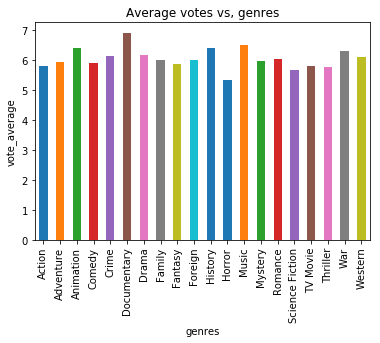

In [23]:
plt.ylabel('vote_average')
new_df.groupby(['genres']).mean().vote_average.plot(kind='bar', title = 'Average votes vs, genres');

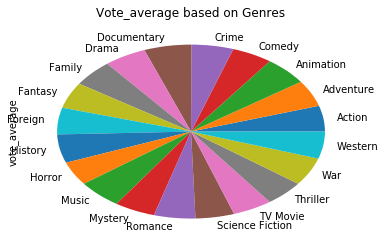

In [24]:
new_df.groupby(['genres']).mean().vote_average.plot(kind='pie', title='Vote_average based on Genres');

I can conclude that many people voted for documentary.

### Research Question 2: How does the movie duration affect the voting average?

I calculated the mean of runtime

In [25]:
new_df.runtime.mean()

102.80040808755334

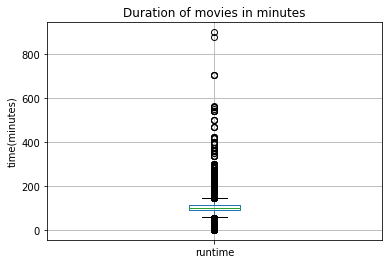

In [26]:
plt.title('Duration of movies in minutes')
plt.ylabel('time(minutes)')
new_df.boxplot(column = 'runtime');

As shown in the boxplot, the outliers are 900. Most of the values are between 100 to 200.

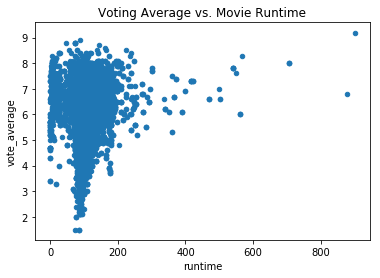

In [27]:
new_df.plot.scatter(x='runtime', y='vote_average', title='Voting Average vs. Movie Runtime');

As shown in the scatter plot above, there is a slight positive correlation. Since most movies are between 0 to 200 hours most of the data are plotted between 0 to 200 hours. The longer the movie then the voting average is usually high.  

### Research Question 3: How does the release year correlate with the voting average?

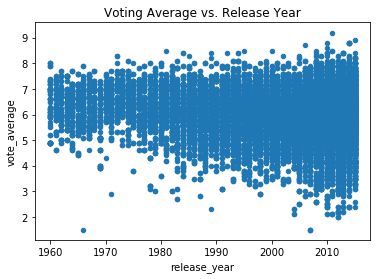

In [28]:
new_df.plot.scatter(x='release_year',y='vote_average', title='Voting Average vs. Release Year');

There is no correlation in this data.

### Research Question 4: What is the correlation between popularity and voting average?

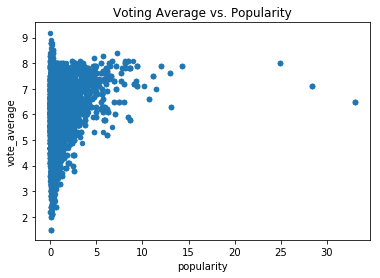

In [29]:
new_df.plot.scatter(x='popularity', y='vote_average', title='Voting Average vs. Popularity');

There is a positive correlation between the voting average and popularity. 

<a id='conclusions'></a>
## Conclusions
For the first question, I found that most people voted for documentary. Horror film have the least numbers of votes. 
For the second question, I found that if the movie was longer then there is higher voting average. The scatter plot showed a positive correlation. For third question, the voting average and release year has a weak correlation. The popularity and the voting average do have a positive correlation. 

I faced limitations working on this project. I do need to make more visualizations in order to arrive at a strong conclusion. But for some question I was not able to use certain visualizations because there were unclear. For instance, on research question 2 I tried to use a bar graph and a pie chart in order to visualize the data more indepth. But it turned out to be messy because the x axis which represented the runtime was all over the place. Some x values were overwritten on the other x values. Since there were many values for runtime I decided to use scatter plot and box plot for that data. 


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0